In [31]:
from tensorflow import keras
# from sklearn import svm,metrics
# from sklearn.neighbors import KNeighborsClassifier # 븐류
# from sklearn.neighbors import KNeighborsRegressor # 회귀- 예측
from sklearn.linear_model import LinearRegression # 선형회귀
from sklearn.preprocessing import PolynomialFeatures # 다항특성을 만들어주는 라이브러리
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import glob, os.path, re
from collections import Counter
from konlpy.tag import Okt
from konlpy.tag import Kkma
import operator
import matplotlib.pyplot as plt
from wordcloud import WordCloud

matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic

In [32]:
(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [33]:
train_scaled = train_input/255.0

In [34]:
train_scaled,val_scaled, train_target,val_target = train_test_split(
     train_scaled,train_target,test_size=0.2, random_state=42
)

In [35]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu')) #sigmoid
model.add(keras.layers.Dense(10,activation='softmax'))

c:\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#  epochs 돌 때마다 loss,accuracy 값을 저장 
history = model.fit(train_scaled,train_target,epochs=20,
                    validation_data=(val_scaled,val_target))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7660 - loss: 0.6777 - val_accuracy: 0.8320 - val_loss: 0.4693
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8570 - loss: 0.4092 - val_accuracy: 0.8482 - val_loss: 0.4234
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8687 - loss: 0.3617 - val_accuracy: 0.8628 - val_loss: 0.3825
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 999us/step - accuracy: 0.8775 - loss: 0.3355 - val_accuracy: 0.8737 - val_loss: 0.3506
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 988us/step - accuracy: 0.8870 - loss: 0.3089 - val_accuracy: 0.8723 - val_loss: 0.3605
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 993us/step - accuracy: 0.8904 - loss: 0.3006 - val_accuracy: 0.8748 - val_loss: 0.3478
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 983us/step - accuracy: 0.8936 - loss: 0.2870 - val_accuracy: 0.8809 - val_loss: 0.3323
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9025 - loss: 0

In [38]:
model.evaluate(val_scaled,val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 0.8859 - loss: 0.3443


[0.342081218957901, 0.8884166479110718]

In [39]:
history.history['accuracy']
history.history['loss']

[0.5290908217430115,
 0.39744502305984497,
 0.35884714126586914,
 0.3298288881778717,
 0.3110719919204712,
 0.2969949245452881,
 0.2817746698856354,
 0.2730039060115814,
 0.2596719264984131,
 0.2519091069698334,
 0.24305930733680725,
 0.23507897555828094,
 0.22770804166793823,
 0.21987207233905792,
 0.21459631621837616,
 0.21006430685520172,
 0.20299547910690308,
 0.1980459839105606,
 0.19383016228675842,
 0.18885251879692078]

검증손실 

-확인방법 : history : fit(validate)

Text(0, 0.5, 'loss')

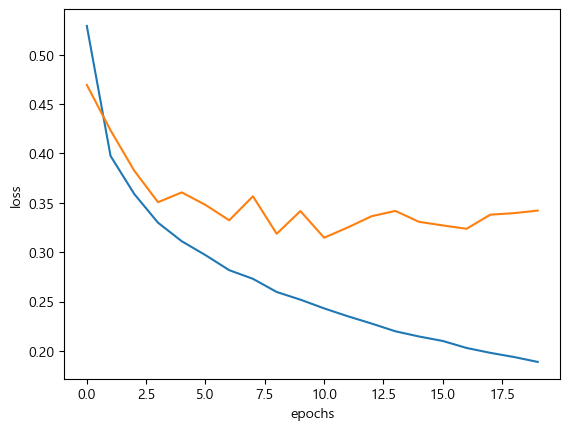

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

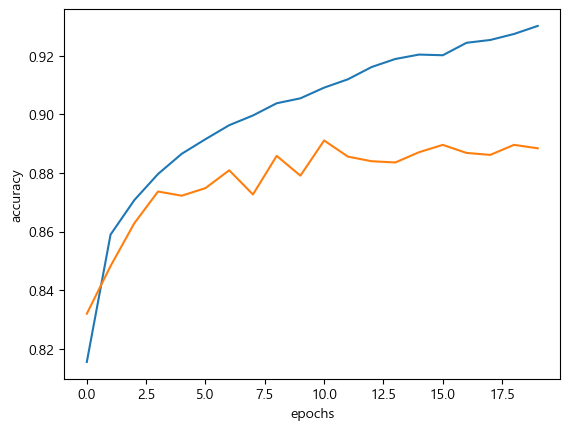

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

드롭아웃 규제적용 - 과대적합 문제 해결

epoch를 증가 할 때 훈련세트에는 정확도가 높은데, 검증세트에는 정확도가 높지 않음

In [42]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu')) #sigmoid
model.add(keras.layers.Dropout(0.3)) # 30%를 제외시키는 규제 적용
model.add(keras.layers.Dense(10,activation='softmax'))

In [43]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#  epochs 돌 때마다 loss,accuracy 값을 저장 
history = model.fit(train_scaled,train_target,epochs=20,
                    validation_data=(val_scaled,val_target))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7397 - loss: 0.7429 - val_accuracy: 0.8479 - val_loss: 0.4229
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8420 - loss: 0.4442 - val_accuracy: 0.8528 - val_loss: 0.3969
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8507 - loss: 0.4083 - val_accuracy: 0.8689 - val_loss: 0.3587
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8604 - loss: 0.3816 - val_accuracy: 0.8658 - val_loss: 0.3716
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8659 - loss: 0.3670 - val_accuracy: 0.8733 - val_loss: 0.3488
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8692 - loss: 0.3560 - val_accuracy: 0.8755 - val_loss: 0.3380
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8754 - loss: 0.3408 - val_accuracy: 0.8732 - val_loss: 0.3474
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8790 - loss: 0.3267 - 

Text(0, 0.5, 'loss')

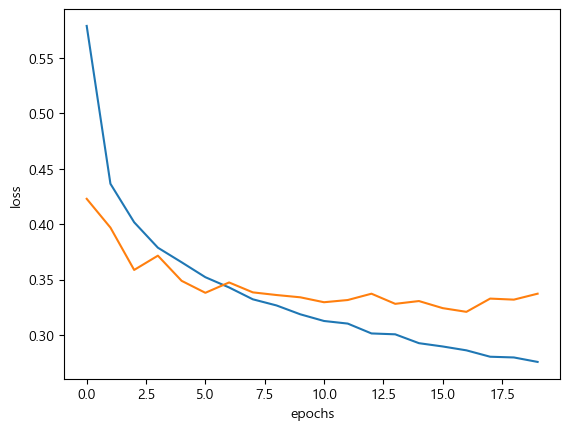

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

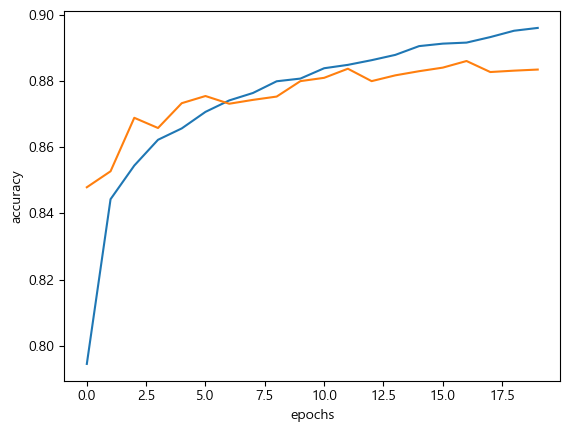

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

모델 저장과 복원

- save_weights : 가중치만 저장
- save : 모델 전체 저장

In [47]:
model.save_weights('model0529.weights.h5')

In [48]:
model.save('model_all.h5')

In [49]:
model.load_weights('model0529.weights.h5')

In [50]:
# model_weights 읽어와서 데이터 처리
val_labels = np.argmax(model.predict(val_scaled),axis=-1)
np.mean(val_labels == val_target) # 가장 높은 값 중에 정답과 일치하는 것만 평균으로 적용

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step


0.8835

In [51]:
model.predict(val_scaled)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step


array([[3.65188091e-15, 9.10160964e-21, 2.47625847e-17, ...,
        2.15926799e-12, 1.00000000e+00, 4.96493573e-18],
       [5.26955768e-09, 5.50651073e-18, 1.35535055e-11, ...,
        2.21105224e-15, 1.00000000e+00, 3.78693674e-17],
       [1.10966123e-15, 6.05231360e-12, 7.56624753e-17, ...,
        9.99738038e-01, 8.37113712e-11, 6.40478390e-08],
       ...,
       [3.12776297e-06, 3.72921355e-12, 1.98706651e-09, ...,
        1.20398856e-11, 9.99995589e-01, 1.37722071e-12],
       [1.60339953e-11, 8.66163153e-19, 3.55818145e-14, ...,
        4.64748820e-16, 1.00000000e+00, 2.62634808e-17],
       [1.93202384e-02, 1.95203809e-09, 4.64666082e-04, ...,
        7.56593226e-06, 7.95452706e-07, 9.56639349e-02]], dtype=float32)

In [7]:
# 모델 전체를 저장 한 것을 불러와서 처리
from tensorflow import keras
model = keras.models.load_module('model_all.h5')

AttributeError: module 'keras.api.models' has no attribute 'load_module'

In [54]:
model.evaluate(val_scaled,val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.8869 - loss: 0.3342


[0.3372246325016022, 0.8834999799728394]